# INTRODUCTION

TikTok seeks a way to use machine learning to extract claims or propositions within TikTok videos and comments and classify each data point as a claim or opinion.__The purpose__ of this project is to conduct exploratory data analysis on the data set. The mission is to investigate and perform EDA on the data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos. __The goal__ is to explore the dataset and create visualizations. __PACE__ is a strategy that stands for: Plan, Analyze, Construct and Execute.

# About PACE framework:

__1.Plan__: In this initial phase, you define the objectives of your analysis, identify the data sources you need, and plan out the steps you will take to reach your goals. This involves setting clear goals, determining the scope of your analysis, and creating a roadmap for the entire process

__2.Analyze__: This step involves gathering and preparing the data for analysis. You may need to clean the data, handle missing values, and perform any necessary transformations to make it suitable for analysis. This phase also includes exploratory data analysis to understand the characteristics of the data

__3.Conduct__: In this phase, you apply statistical or machine learning techniques to derive insights from the data. This is where you build models, perform hypothesis testing, and extract meaningful patterns or relationships from the data

__4.Execute__: The final step involves interpreting the results of your analysis and communicating them effectively to stakeholders. This may include creating visualizations, preparing reports, and making recommendations based on your findings

__By following the PACE framework, I can ensure a structured approach to my analysis process, leading to more efficient and effective outcomes__

# PACE: Plan

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

In [42]:
df = pd.read_csv('tiktok_dataset.csv')

# PACE: Analyze

__Data exploration and cleaning__

In [43]:
# Display and examine first few rows of the dataframe
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [44]:
# Get the size of the data
df.size

232584

In [45]:
# Get the shape of the data
df.shape

(19382, 12)

In [46]:
# Generate a table of descriptive statistics
df.describe(include="all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


In [47]:
# Get the basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [48]:
# Data type of each column
df.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [49]:
# Check null values
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

# PACE: Contruct

__Build visualizations__

__Video Duration in Seconds__

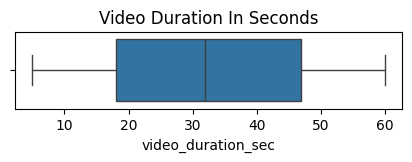

In [50]:
# A boxplot to visualize distribution of `video_duration_sec
plt.figure(figsize=(5,1))
sns.boxplot(x=df['video_duration_sec'])
plt.title('Video Duration In Seconds');

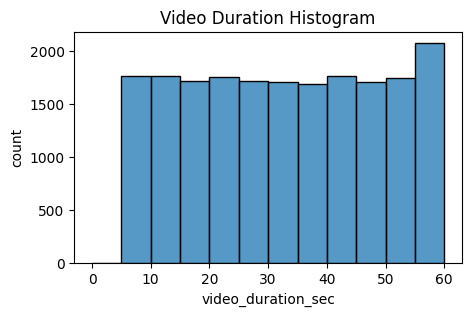

In [51]:
# A histogram showing the values in 'video_duration_sec' to further explore the distribution of this variable
plt.figure(figsize=(5,3))
sns.histplot(df['video_duration_sec'], bins=range(0, 61, 5))
plt.title('Video Duration Histogram')
plt.xlabel('video_duration_sec')
plt.ylabel('count');

__Observation:__
All videos are 5-60 seconds in length, and the distribution is uniform

__Video View Count__

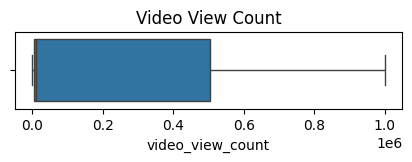

In [52]:
# A boxplot vizualizing the distribution of the'video_view_count'
plt.figure(figsize=(5,1))
plt.title('Video View Count')
sns.boxplot(x=df['video_view_count']);

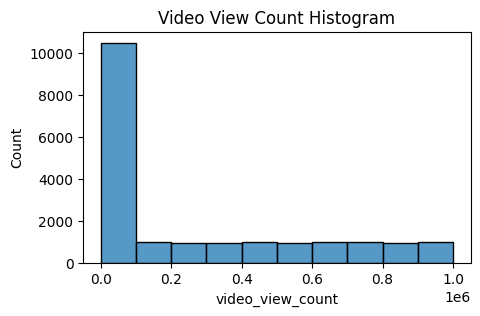

In [53]:
# A histogram to further explore the distribution of the video_view_count column
plt.figure(figsize=(5,3))
sns.histplot(df['video_view_count'], bins=range(0, 10**6 + 1, 10**5))
plt.title('Video View Count Histogram');

__Observation:__
This variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

__Video Like Count__

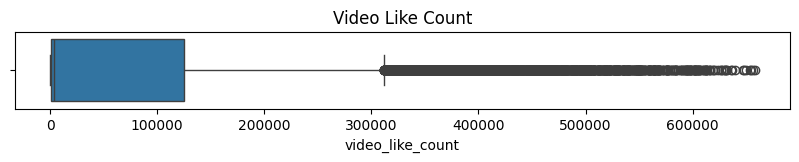

In [54]:
# A boxplot to visualize the distribution of video_like_count
plt.figure(figsize=(10,1))
sns.boxplot(x=df['video_like_count'])
plt.title('Video Like Count');

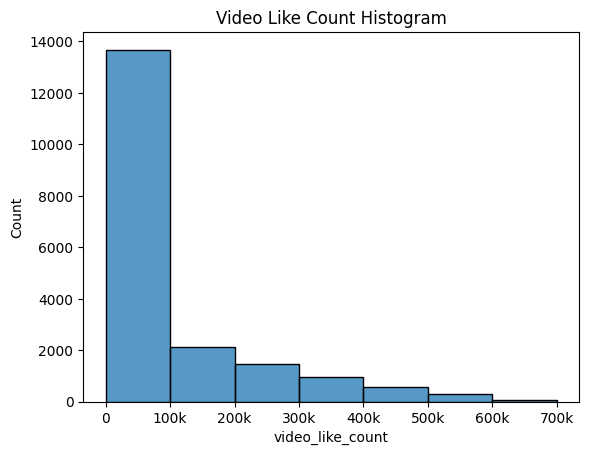

In [55]:
# A histogram to further explore the distribution of video_like_count column
ax = sns.histplot(df['video_like_count'], bins = range(0, (7*10**5 + 1), 10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0, (7*10**5 + 1), 10**5), labels=labels)
plt.title('Video Like Count Histogram');


__Observation:__
Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count

__Video Comment Count__

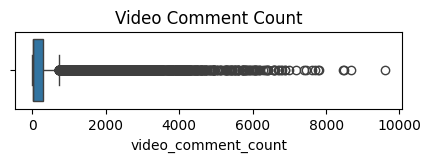

In [56]:
# A boxplot to visualize the distribution of the video_comment_count column
plt.figure(figsize=(5,1))
sns.boxplot(x=df['video_comment_count'])
plt.title('Video Comment Count');

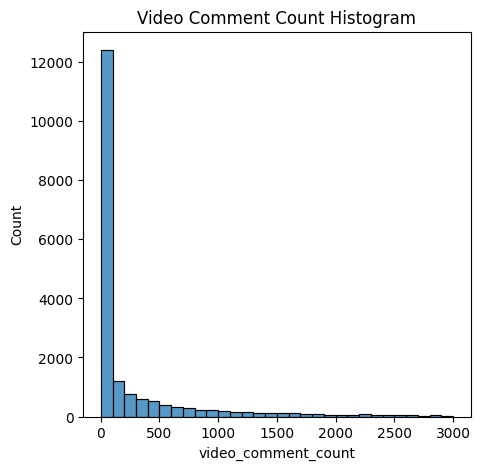

In [57]:
# A Histogram to further explor ethe distribution of the video_comment_count column
plt.figure(figsize=(5,5))
sns.histplot(df['video_comment_count'], bins=range(0,3001,100))
plt.title('Video Comment Count Histogram');

__Observation:__
Most videos have fewer than 100 comments. The distribution is very right-skewed

__Video Share Count__

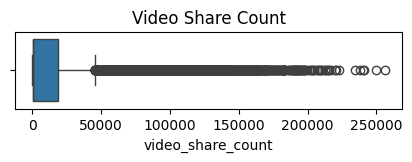

In [58]:
# A boxplot to visualize distribution of video_share_count
plt.figure(figsize=(5,1))
sns.boxplot(x=df['video_share_count'])
plt.title('Video Share Count');

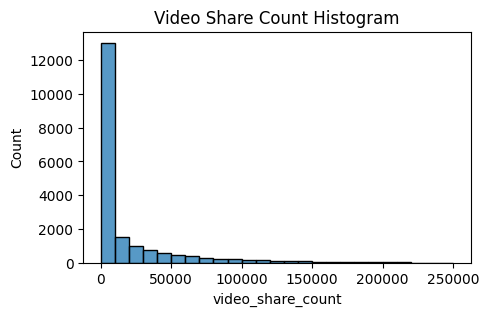

In [59]:
# A Histogram to further explore the distribution of video_share_count
plt.figure(figsize=(5,3))
sns.histplot(df['video_share_count'], bins=range(0,250001,10000))
plt.title('Video Share Count Histogram');

__Observation:__
The majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right

__Video Download Count__

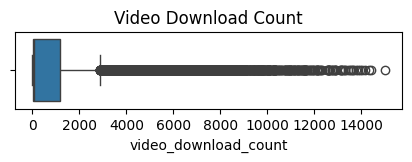

In [60]:
# A boxplot to visualize distribution of video_download_count
plt.figure(figsize=(5,1))
sns.boxplot(x=df['video_download_count'])
plt.title('Video Download Count');

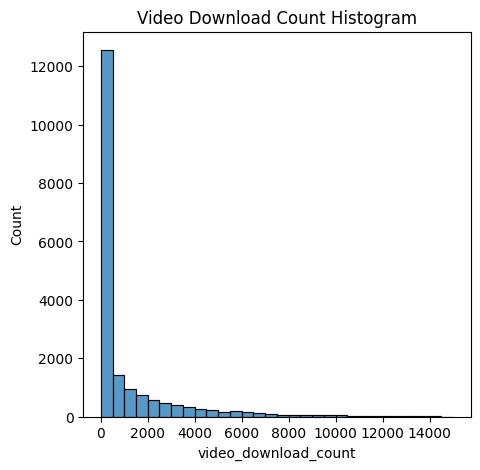

In [61]:
# A Histogram to further explore the distribution of video_doenload_count
plt.figure(figsize=(5,5))
sns.histplot(df['video_download_count'], bins=range(0,15001,500))
plt.title('Video Download Count Histogram');

__Observation:__
The majority of videos were downloaded fewer than 500 times, but some were downloaded over 10,000 times.The data is very skewed to the right.

__Claim Status By Verification Status__

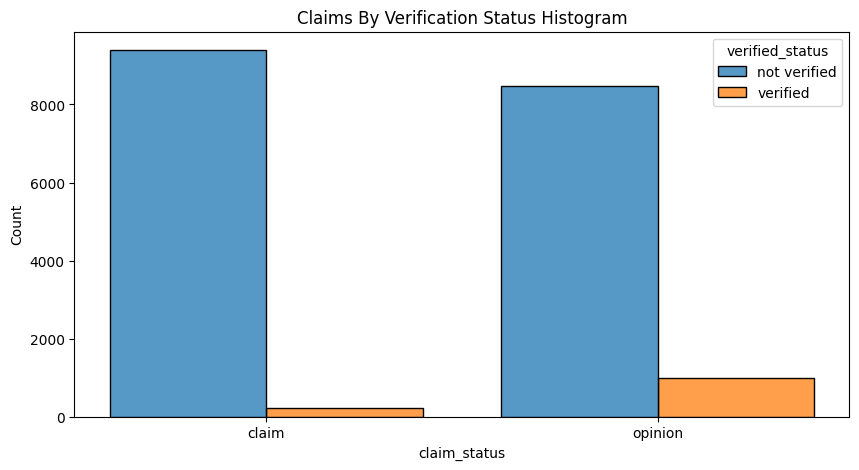

In [62]:
# A Histogram with 4 bars:One for each verification of claim status and verification status
plt.figure(figsize=(10,5))
sns.histplot(data=df,
            x='claim_status',
            hue='verified_status',
            multiple='dodge',
            shrink=0.8)
plt.title('Claims By Verification Status Histogram');

__Observation:__
There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions

__Claim Status By Author Ban Status__

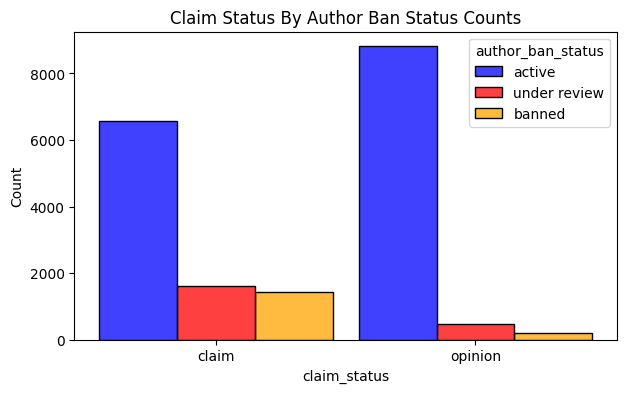

In [63]:
plt.figure(figsize=(7,4))
sns.histplot(df, x='claim_status', hue='author_ban_status',
            multiple='dodge',
            hue_order=['active', 'under review', 'banned'],
            shrink=0.9,
            palette={'active': 'blue', 'under review':'red','banned':'orange'})
plt.title('Claim Status By Author Ban Status Counts');

__Observation:__
For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

__Median View Counts By Ban Status__

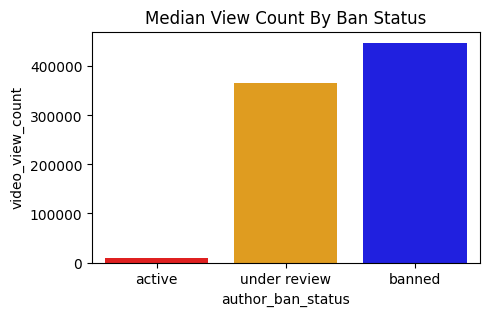

In [64]:
ban_status_counts=df.groupby(['author_ban_status']).median(numeric_only=True).reset_index()
fig=plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
           x='author_ban_status',
           y='video_view_count',
           order=['active', 'under review', 'banned'],
           palette={'active':'red','under review':'orange','banned':'blue'})
plt.title('Median View Count By Ban Status');

__Observation:__
The median view counts for non-active authors are many times greater than the median view count for active authors. Since non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

In [ ]:
# A quick check of the median view count by claim status bears out this assessment:
df.groupby(['claim_status'])['video_view_count'].median()

__Total Views By Claim Status__

Text(0.5, 1.0, 'Total View By Video Claim Status')

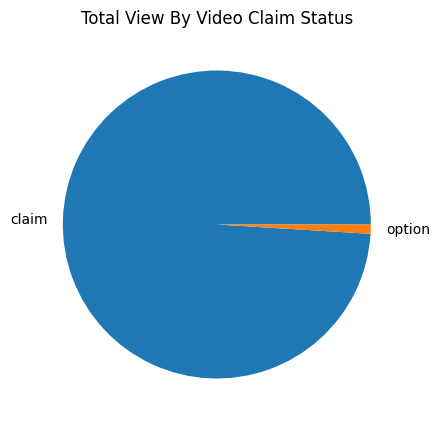

In [67]:
# A pie graph that depicts the proportions of total views for claim videos and total views for opinion videos
plt.figure(figsize=(5,5))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'option'])
plt.title('Total View By Video Claim Status');

__Observation:__
The overall view count is dominated by claim videos

__Determine Outliers__

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of a project, and it helps to have domain expertise to decide a threshold.A common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the median value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:

Calculate the IQR of the column Calculate the median of the column Calculate the outlier threshold (median + 1.5 * IQR) Calculate the numer of videos with a count in that column that exceeds the outlier threshold Print "Number of outliers, {column name}: {outlier count}"

In [68]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


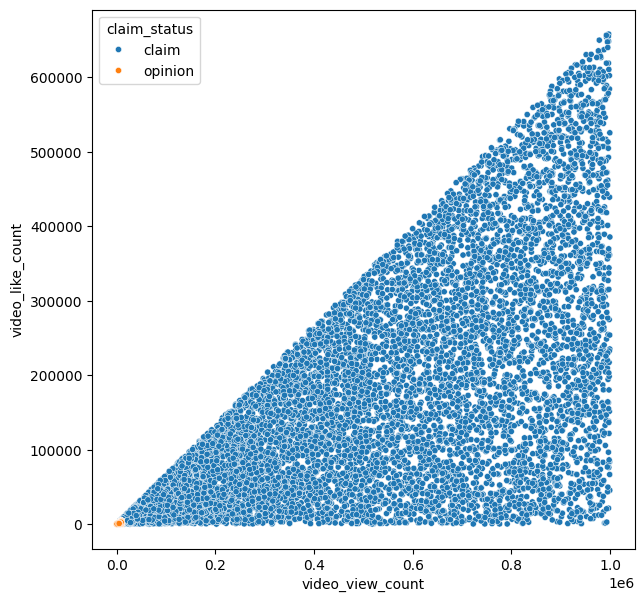

In [72]:
# A scatterplot to visualize the'video_view_count' and 'video_like_count' accprding to claim status
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['video_view_count'], y=df['video_like_count'], hue=df['claim_status'], s=20)
plt.show()

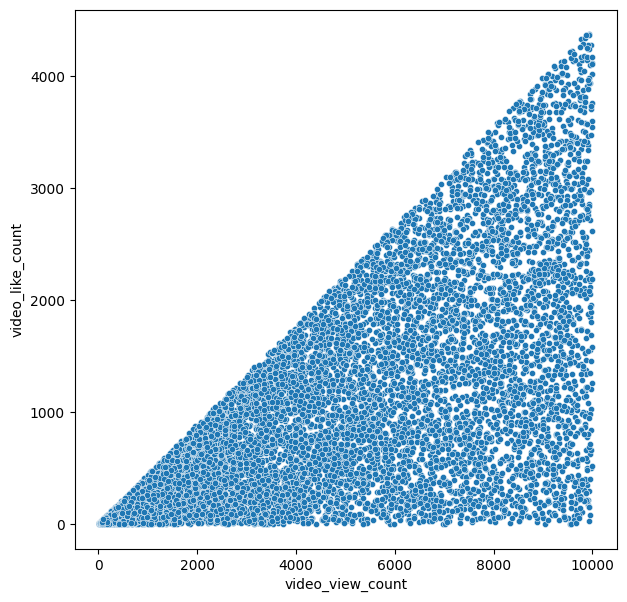

In [73]:
# A scatterplot vizualizing the 'video_view_count' versus 'video _like_count' for opinions only
plt.figure(figsize=(7,7))
opinion=df[df['claim_status']=='opinion']
sns.scatterplot(x=opinion['video_view_count'], y=opinion['video_like_count'],s=20)
plt.show()

# PACE: Excecute

__Results and Evaluation__
- I examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. I analyzed correlations between variables, particularly between the claim_status variable and others

- I want to further investigate distinctive characteristics that apply only to claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data